In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go


In [2]:
world = pd.read_csv("owid-covid-data.csv", sep = ",")

In [15]:
world.isnull().sum()


iso_code                                   346
continent                                  708
location                                     0
date                                         0
total_cases                                585
new_cases                                  592
new_cases_smoothed                        1547
total_deaths                              9048
new_deaths                                9049
new_deaths_smoothed                       1547
total_cases_per_million                    931
new_cases_per_million                      938
new_cases_smoothed_per_million            1888
total_deaths_per_million                  9381
new_deaths_per_million                    9382
new_deaths_smoothed_per_million           1888
reproduction_rate                        11938
icu_patients                             54154
icu_patients_per_million                 54154
hosp_patients                            53103
hosp_patients_per_million                53103
weekly_icu_ad

C6. Show different tendencies for each column (top 10 with less NaNs) in your dataset.
Show, vertically, the start date and end date of the alarm state in each plot. If there
is no alarm state, then show only the start date.


B4. When are the worst moments to go to the countries? Answer this referring to the
“per_million” columns.


Extraigo las columnas necesarias para el análisis de tendencias por columnas y el posterior de peor momento para ir a los paises (columnas _per_million)

Analisis de tendencias por columnas: columnas de estudio: Descarto las weekly_ por la cantidad de nulos. Los paises europeos tienen mejor calidad de datos que Turquia y Venezuela, cuya cantidad de NaNs me hace descartar algunas columnas mas.

Elimino las que tienen muchos valores nulos 

icu_patients                             54154
icu_patients_per_million                 54154
hosp_patients                            53103
hosp_patients_per_million                53103
weekly_icu_admissions                    60119
weekly_icu_admissions_per_million        60119
weekly_hosp_admissions                   59743
weekly_hosp_admissions_per_million       59743
new_tests                                32672
total_tests                              32853
total_tests_per_thousand                 32853
new_tests_per_thousand                   32672
new_tests_smoothed                       29207
new_tests_smoothed_per_thousand          29207
tests_per_case                           31440
tests_units                              28050
total_vaccinations                       60083
new_vaccinations                         60252
new_vaccinations_smoothed                59872
total_vaccinations_per_hundred           60083
new_vaccinations_smoothed_per_million    59872
female_smokers                           14609
male_smokers                             15240
handwashing_facilities                   31473
extreme_poverty                          21146

Descarto las columnas con datos estimados (_smoothed), continent y location

Descarto las columnas que tienen un valor fijo o que no proporcionan unformación de tendencias.
median_age                                2949
aged_65_older                             3619
aged_70_older                             3276
gdp_per_capita                            2920
cardiovasc_death_rate                     2319
diabetes_prevalence                       1644
hospital_beds_per_thousand                7063
life_expectancy                            656
human_development_index                   2662

#Columnas en el DataFrame de estudio de tendencias

iso_code                                   346
date                                         0
total_cases                                585
new_cases                                  592
total_deaths                              9048
new_deaths                                9049
reproduction_rate                        11938
stringency_index                          6777
positive_rate                            30965 Uso esta columna a pesar de su alto valor de nulos
total_cases_per_million                    931
new_cases_per_million                      938
total_deaths_per_million                  9381
new_deaths_per_million                    9382
icu_patients_per_million                 54154
hosp_patients_per_million                53103


In [3]:
world_cols = world.drop(world.columns.difference(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million','new_cases_per_million','total_deaths_per_million', 'new_deaths_per_million','reproduction_rate', 'icu_patients_per_million', 'hosp_patients_per_million', 'positive_rate', 'stringency_index']), 1)

In [25]:
world_cols.columns

Index(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'reproduction_rate', 'icu_patients_per_million',
       'hosp_patients_per_million', 'positive_rate', 'stringency_index'],
      dtype='object')

In [4]:
world_cols.isnull().sum()

iso_code                       346
date                             0
total_cases                    585
new_cases                      592
total_deaths                  9048
new_deaths                    9049
total_cases_per_million        931
new_cases_per_million          938
total_deaths_per_million      9381
new_deaths_per_million        9382
reproduction_rate            11938
icu_patients_per_million     54154
hosp_patients_per_million    53103
positive_rate                30965
stringency_index              6777
dtype: int64

In [5]:
gbr = world_cols[world_cols["iso_code"]=="GBR"]
prt = world_cols[world_cols["iso_code"]=="PRT"]
ven = world_cols[world_cols["iso_code"]=="VEN"]
tur = world_cols[world_cols["iso_code"]=="TUR"]
esp = world_cols[world_cols["iso_code"]=="ESP"]

In [68]:
gbr.dropna(how = 'any', inplace = True)
esp.dropna(how = 'any', inplace = True)
prt.dropna(how = 'any', inplace = True)
tur.dropna(how = 'any', inplace = True)
ven.dropna(how = 'any', inplace = True)

<ipython-input-68-865d2b292969>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-865d2b292969>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-865d2b292969>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-865d2b292969>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [6]:
# Columnas de estudio de los 5 paises analizados
countries_cols = pd.concat([gbr, prt, ven, tur, esp])
countries_cols.columns
countries_cols.isnull().sum()

iso_code                       0
date                           0
total_cases                    6
new_cases                      7
total_deaths                 106
new_deaths                   106
total_cases_per_million        6
new_cases_per_million          7
total_deaths_per_million     106
new_deaths_per_million       106
reproduction_rate            148
icu_patients_per_million     958
hosp_patients_per_million    953
positive_rate                512
stringency_index              30
dtype: int64

In [71]:
countries_cols.dtypes

iso_code                      object
date                          object
total_cases                  float64
new_cases                    float64
total_deaths                 float64
new_deaths                   float64
total_cases_per_million      float64
new_cases_per_million        float64
total_deaths_per_million     float64
new_deaths_per_million       float64
reproduction_rate            float64
icu_patients_per_million     float64
hosp_patients_per_million    float64
positive_rate                float64
stringency_index             float64
dtype: object

In [67]:
countries_cols.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
count,1.650000e+03,1649.000000,1550.000000,1550.000000,1650.000000,1649.000000,1550.000000,1550.000000,1508.000000,698.000000,703.000000,1144.000000,1626.000000
mean,3.924062e+05,4785.557307,16625.221290,114.004516,8440.793904,106.133123,323.457935,2.354879,1.169443,19.730395,148.302269,0.057371,67.403967
std,6.099025e+05,9495.136589,19359.564839,219.650463,11561.223762,187.862613,325.864360,4.033468,0.484354,17.798147,123.203318,0.053613,17.952281
min,1.000000e+00,-10034.000000,1.000000,-1918.000000,0.012000,-214.609000,0.012000,-41.023000,0.240000,0.000000,0.000000,0.001000,8.330000
25%,3.882150e+04,301.000000,1023.500000,4.000000,1700.452000,10.885000,36.072250,0.176000,0.930000,5.121250,41.316000,0.017000,63.890000
50%,1.805645e+05,987.000000,5877.500000,20.000000,3960.808000,23.733000,173.683500,0.588000,1.080000,13.583000,106.309000,0.036500,70.140000
75%,3.495142e+05,4056.000000,29619.500000,113.750000,7663.741250,88.460000,607.701000,2.841500,1.270000,32.548000,249.090000,0.087000,79.630000
max,3.405740e+06,68192.000000,89429.000000,1623.000000,53919.466000,1313.705000,1317.341000,34.713000,6.120000,67.501000,542.041000,0.429000,90.740000


In [68]:
esp.describe()
#gbr.describe()
#prt.describe()
#tur.describe()
ven.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
count,310.000000,310.000000,297.000000,297.000000,310.000000,310.000000,297.000000,297.000000,288.000000,0.0,0.0,0.0,303.000000
mean,46060.141935,386.461290,419.444444,3.723906,1619.786023,13.590623,14.750589,0.131044,1.090625,NaN,NaN,NaN,84.311980
std,44331.314065,340.453215,389.384074,2.974759,1558.988675,11.972629,13.693306,0.104640,0.266567,NaN,NaN,NaN,4.077023
min,2.000000,0.000000,1.000000,-6.000000,0.070000,0.000000,0.035000,-0.211000,0.560000,NaN,NaN,NaN,51.850000
25%,1471.750000,68.000000,23.000000,1.000000,51.756500,2.391250,0.809000,0.035000,0.920000,NaN,NaN,NaN,82.410000
50%,33181.000000,323.000000,323.000000,4.000000,1166.868500,11.358500,11.359000,0.141000,1.025000,NaN,NaN,NaN,84.260000
75%,92247.000000,608.750000,814.000000,6.000000,3244.028000,21.408000,28.626000,0.211000,1.240000,NaN,NaN,NaN,87.040000
max,119803.000000,1281.000000,1106.000000,12.000000,4213.083000,45.049000,38.894000,0.422000,2.170000,NaN,NaN,NaN,90.740000


In [ ]:
#NO HAY DUPLICADOS
#gbr.duplicated().sum()
#prt.duplicated().sum()
#esp.duplicated().sum()
#tur.duplicated().sum()
#ven.duplicated().sum()

In [77]:
##????? Psarlo a formato datetime?
# world['date'] = pd.to_datetime(world['date'])
world['date']

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
60689    2021-01-13
60690    2021-01-14
60691    2021-01-15
60692    2021-01-16
60693    2021-01-17
Name: date, Length: 60694, dtype: object

# GRAFICAS POR COLUMNAS

In [7]:
countries_cols.columns



Index(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'reproduction_rate', 'icu_patients_per_million',
       'hosp_patients_per_million', 'positive_rate', 'stringency_index'],
      dtype='object')

In [8]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['total_cases'])], layout_title_text="total_cases")
fig.show()

In [9]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['new_cases'])], layout_title_text="new_cases")
fig.show()

In [10]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['total_deaths'])], layout_title_text="total_deaths")
fig.show()

In [11]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['new_deaths'])], layout_title_text="new_deaths")
fig.show()

In [12]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['positive_rate'])], layout_title_text="positive_rate")
fig.show()

In [13]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['reproduction_rate'])], layout_title_text="'reproduction_rate'")
fig.show()

In [1]:
my_plot_esp = esp.plot("date", "new_cases", kind="line", figsize=(50,10), title = 'España-New_Cases', xlabel = 'Date', ylabel = 'New Cases')

my_plot_gbr = gbr.plot("date", "new_cases", kind="line", figsize=(50,10),title = 'UK -New_Cases', xlabel = 'Date', ylabel = 'New Cases')

my_plot_prt = prt.plot("date", "new_cases", kind="line", figsize=(50,10),title = 'Portugal -New_Cases', xlabel = 'Date', ylabel = 'New Cases')
my_plot_tur = tur.plot("date", "new_cases", kind="line", figsize=(50,10),title = 'Turquia - New_Cases', xlabel = 'Date', ylabel = 'New Cases')
my_plot_ven = ven.plot("date", "new_cases", kind="line", figsize=(50,10),title = 'Venezuela -New_Cases', xlabel = 'Date', ylabel = 'New Cases')

plt.show() 

NameError: name 'esp' is not defined

#ALGUNAS DE LAS GRAFICAS QUE VIENEN A CONTINUACION SALEN MAL. TENGO QUE VER TEMA OUTLIERS O QUE NO HAYA HECHO BIEN EL FILTRADO DE NAN O DESCARTARLAS.
VENEZUELA SALE MUY MAL, TENGO QUE REVISARLO

FALTA METER EL ESTADO DE ALARMA EN LA GRAFICA. SOLO LO HAN TENIDO ESPAÑA Y PORTUGAL 
    - España: 14marzo - 21 junio. 25 octubre- 9 mayo
	- Portugal: 13 marzo alerta. emergencia 16 marzo-4 mayo. calamidad 4 nov. EMERGENCIA 9nov- 8 dic
				- GBR leyes especificas
	- TUR confinamiento
	- VEN ??

In [78]:
import plotly.express as px

fig = px.line(countries_cols, x='date', y='new_cases')
fig.show()

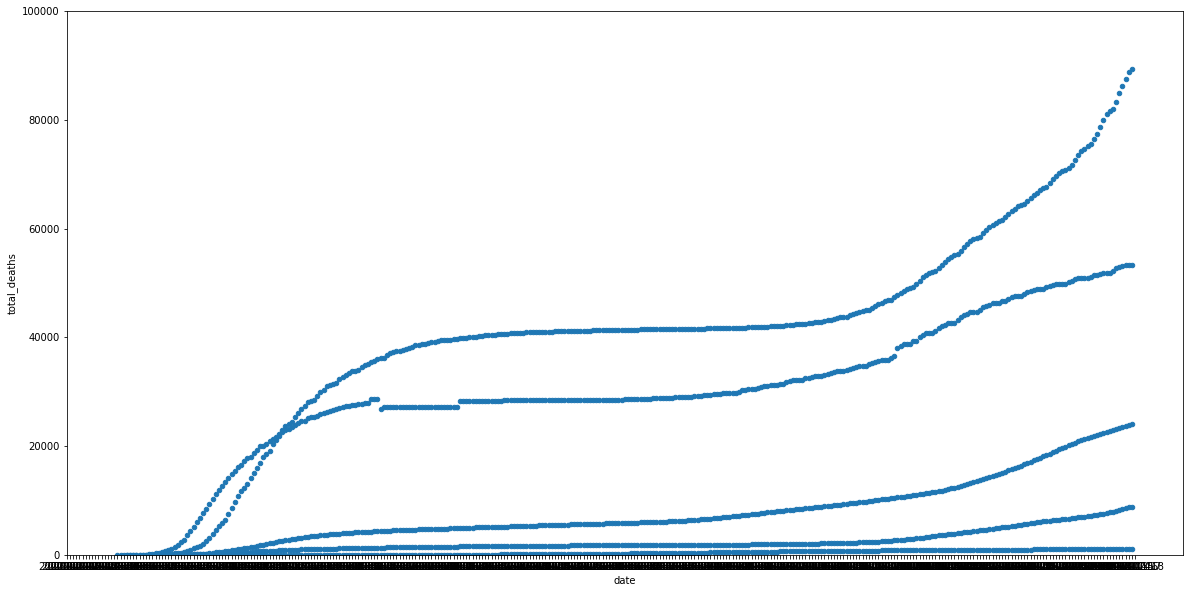

In [79]:
countries_cols.plot.scatter(x='date', y='total_deaths', ylim=(0,100000), figsize = (20,10));

In [ ]:
# COLUMNAS PER MILLION

In [14]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['total_cases_per_million'])], layout_title_text="total_cases_per_million")
fig.show()

In [15]:

fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['new_cases_per_million'])], layout_title_text="new_cases_per_million")
fig.show()

In [16]:

fig = go.Figure(data=[go.Bar(x=esp['date'], y=esp['total_deaths_per_million'])], layout_title_text="total_deaths_per_million")
fig.show()

In [17]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['new_deaths_per_million'])], layout_title_text="new_deaths_per_million")
fig.show()

In [18]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['icu_patients_per_million'])], layout_title_text="icu_patients_per_million")
fig.show()

In [19]:
fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['hosp_patients_per_million'])], layout_title_text="hosp_patients_per_million")
fig.show()

OTROS FORMATOS DE GRAFICAS A VALORAR

<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

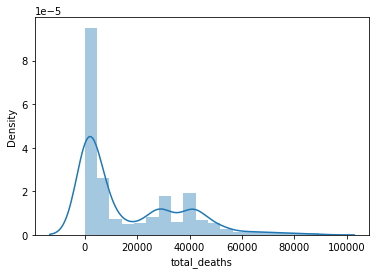

In [20]:
sns.distplot(countries_cols['total_deaths'])

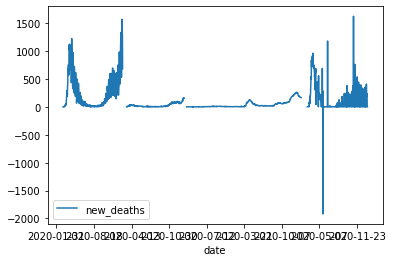

In [61]:
my_plot = countries_cols.plot("date", "new_deaths", kind="line")
plt.show()

In [62]:
#EN DUDA
# fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['tests_per_case'])], layout_title_text="tests_per_case")
#fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['total_tests_per_thousand'])], layout_title_text="total_tests_per_thousand")
#fig = go.Figure(data=[go.Bar(x=countries_cols['date'], y=countries_cols['icu_patients'])], layout_title_text="icu_patients")
#fig.show()

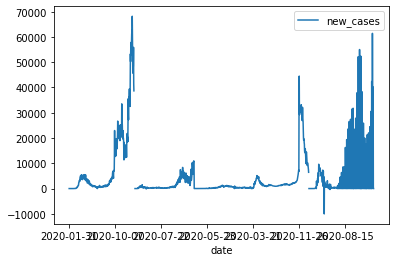

In [69]:
my_plot = countries_cols.plot("date", "new_cases", kind="line")
plt.show()


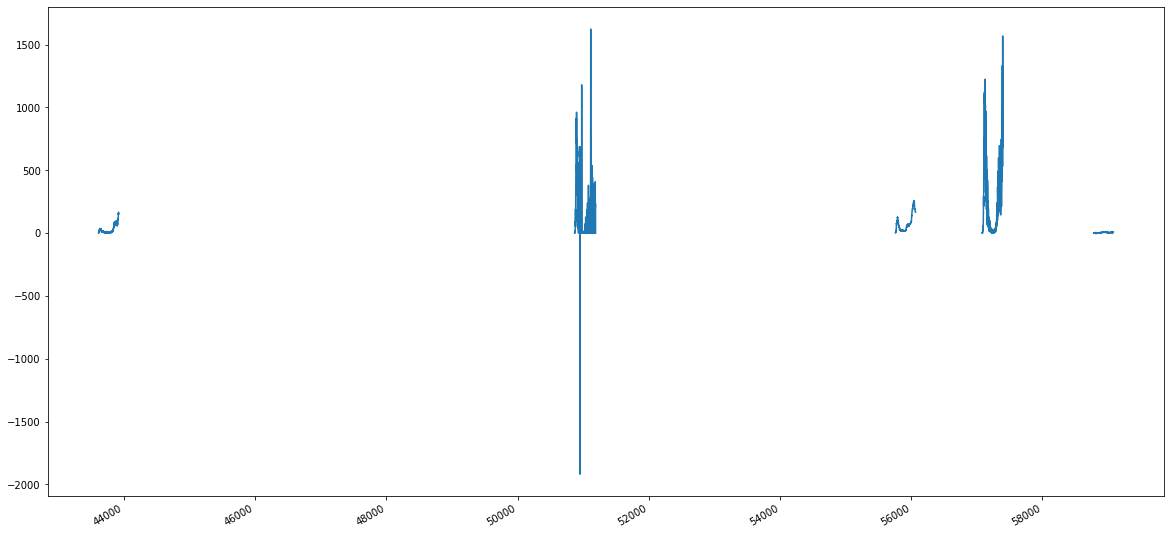

In [70]:
ax = countries_cols['new_deaths'].plot(subplots=True, figsize= (20,10))

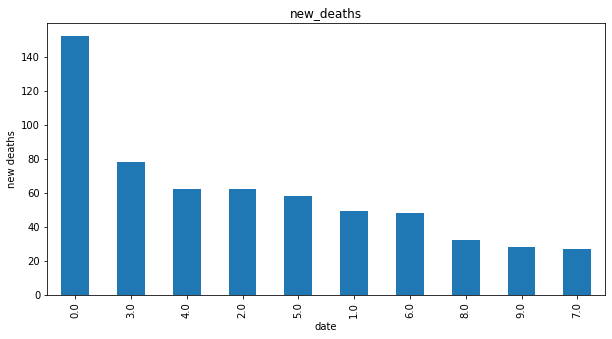

In [71]:
countries_cols.new_deaths.value_counts().sort_values(ascending = False).nlargest(10).plot(kind = 'bar', figsize = (10, 5))
plt.title('new_deaths')
plt.ylabel('new deaths')
plt.xlabel('date')
plt.show()

<AxesSubplot:>

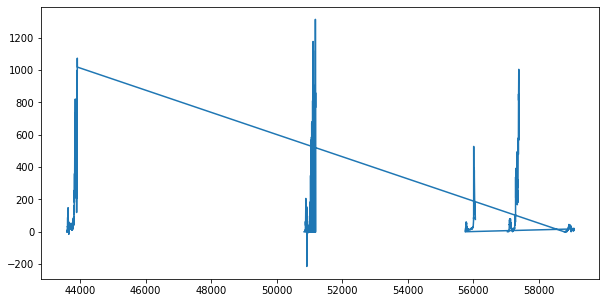

In [80]:
ax = countries_cols['new_cases_per_million'].plot(figsize= (10,5))
ax

In [42]:
fig.add_scatter(x=gbr['date'], y=gbr['new_cases'])
fig.add_scatter(x=tur['date'], y=tur['new_cases'])
fig.add_scatter(x=ven['date'], y=ven['new_cases'])

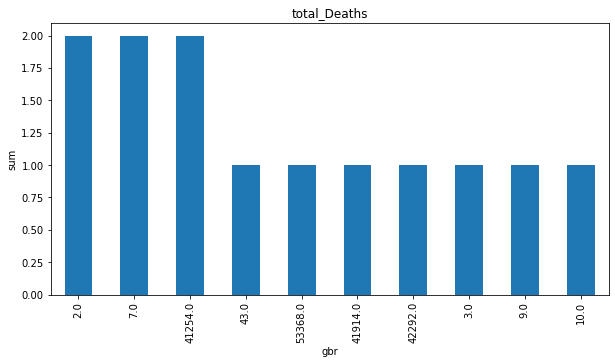

In [121]:
gbr.total_deaths.value_counts().sort_values(ascending = False).nlargest(10).plot(kind = 'bar', figsize = (10, 5))
plt.title('total_Deaths')
plt.ylabel('sum')
plt.xlabel('gbr')
plt.show()

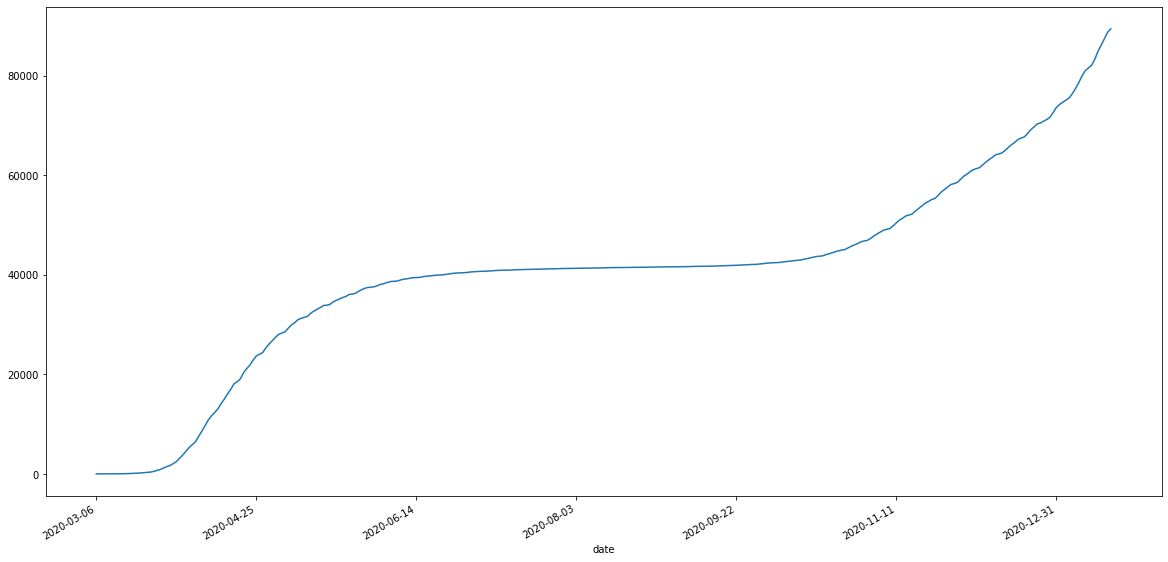

In [144]:

ax = gbr['total_deaths'].plot(subplots=True, figsize= (20,10))

#subplots=True: one subplot per column, instead of one line
#figsize: set figure size, in inches
# x and y: plot one column against another

747654.0

In [54]:
fig = px.line(countries_cols, x="date", y="new_deaths")
fig.update_layout(
    title='Deaths Cases',
    xaxis_title='', yaxis_title=''
)
fig.show()

<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

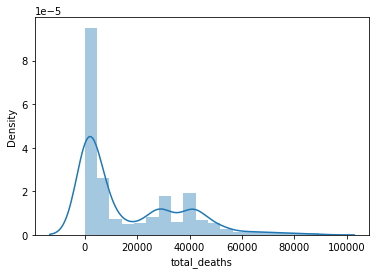

In [81]:
#histogram
sns.distplot(countries_cols['total_deaths'])